<a href="https://colab.research.google.com/github/niuhaoyu16/PythonforBeginners/blob/master/training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)

In [3]:
X_b = np.c_[np.ones((100,1)), X]

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.0903988],
       [3.0566439]])

In [6]:
X_new = np.array([[0],[2]])

In [7]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [8]:
y_predict = X_new_b.dot(theta_best)

In [9]:
y_predict

array([[ 4.0903988 ],
       [10.20368659]])

In [10]:
import matplotlib.pyplot as plt


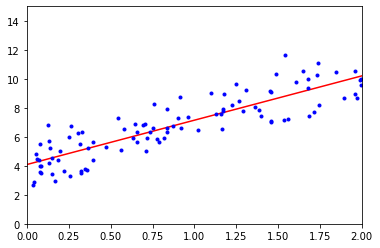

In [11]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([4.0903988]), array([[3.0566439]]))

In [14]:
lin_reg.predict(X_new)

array([[ 4.0903988 ],
       [10.20368659]])

In [15]:
eta = 0.1
n_iter = 1000
m=100

theta = np.random.randn(2,1)

for iter in range(n_iter):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta) -y)
  theta = theta - eta *gradients
  

In [16]:
theta

array([[4.0903988],
       [3.0566439]])

In [17]:
n_epochs = 50
t0,t1 = 5,50

def learning_sche(t):
  return t0 / (t+t1)

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta) -yi)
    eta = learning_sche(epoch*m +i)
    theta = theta -eta*gradients

In [18]:
theta

array([[4.13307392],
       [2.97431697]])

In [19]:
from sklearn.linear_model import SGDRegressor

In [20]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.11675192]), array([3.11038645]))

In [22]:
m = 100
X = 6*np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 +np.random.randn(m,1)

In [55]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
poly_features = PolynomialFeatures(degree=2, include_bias= False)
X_poly = poly_features.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])


X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


In [24]:
X[0]

array([-0.62947437])

In [25]:
X_poly[0]

array([-0.62947437,  0.39623799])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.94024725]), array([[0.94116697, 0.44890779]]))

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [33]:
def plot_learning_curve(model, X, y):
  X_train, X_val, y_train, y_val =train_test_split(X,y,test_size=0.2,random_state=10)
  train_errors, val_errors = [], []
  for m in range(1,len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth =2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.legend(loc="upper right", fontsize=14)   # not shown in the book
  plt.xlabel("Training set size", fontsize=14) # not shown
  plt.ylabel("RMSE", fontsize=14) 

(0.0, 80.0, 0.0, 3.0)

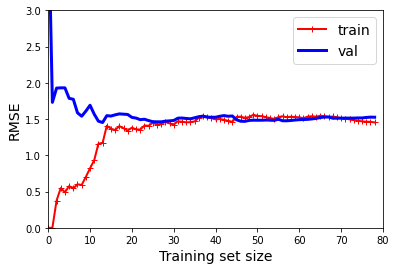

In [34]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.axis([0, 80, 0, 3])

(0.0, 80.0, 0.0, 3.0)

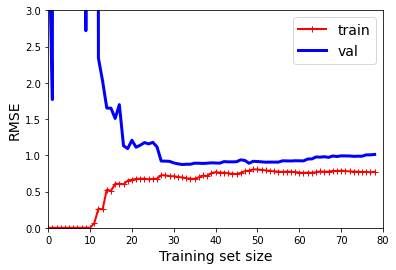

In [42]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
  ])

plot_learning_curve(polynomial_regression,X,y)
plt.axis([0, 80, 0, 3]) 

In [43]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [44]:
ridge_reg.predict([[1.5]])

array([[4.51999263]])

In [45]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.49690243])

In [46]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
lasso_reg.predict([[1.5]])

array([4.46081964])

In [48]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
elastic_net.predict([[1.5]])

array([4.46590873])

In [51]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter =1, warm_start=True, penalty=None,
                       learning_rate = "constant", eta0=0.0005)

In [ ]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val_predict, y_val)
  if val_error<minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

In [58]:
best_epoch, best_model

(501,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=True))

In [59]:
from sklearn import datasets
iris =datasets.load_iris()

In [60]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [61]:
X= iris["data"][:,3:]
y= (iris["target"]==2).astype(np.int)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
X_new = np.linspace(0,3,1000).reshape(-1,1)

In [ ]:
X_new

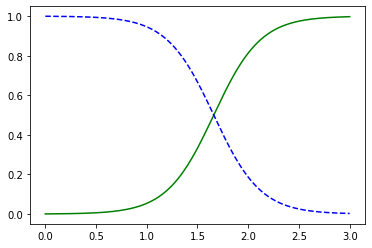

In [68]:
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Vir")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Vir")

In [70]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [71]:
X= iris["data"][:,(2,3)]
y = iris["target"]

In [73]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
softmax_reg.predict([[5,2]])

array([2])

In [77]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])